# **DATA 3402 - Tabular Kaggle Project**

## **Wonho Jeong 1002242697**

### Step 1: Define Project

- ## **Project Title:**
#### Loan Approval Classification Using Key Financial Indicators

- ## **Dataset Link:**
#### https://www.kaggle.com/datasets/lorenzozoppelletto/financial-risk-for-loan-approval?resource=download

- ## **Short Description:**
This project predicts whether a loan application will be approved or denied using a simplified and focused feature set. The goal is to develop a machine learning model based on four core financial and employment-related indicators: CreditScore, AnnualIncome, EmploymentStatus, and TotalDebtToIncomeRatio. These features are chosen for their practical relevance and predictive strength in the loan approval process.

- ## **Dataset Summary:**
**Rows:** 20,000 applications

**Used Features:**

- CreditScore (numerical)

- AnnualIncome (numerical)

- EmploymentStatus (categorical)

- TotalDebtToIncomeRatio (numerical)

**Target Variable:**
- LoanApproved (binary: 0 = denied, 1 = approved)

### Step 2: Data Loading and Initial Look

In [ ]:
# Import required libraries
import pandas as pd

# Load the dataset (only selected features including the target)
selected_columns = ['CreditScore', 'AnnualIncome', 'EmploymentStatus', 'TotalDebtToIncomeRatio', 'LoanApproved']
df = pd.read_csv('Loan.csv', usecols=selected_columns)

# Display the first 5 rows
print("Preview of the selected data:")
display(df.head())

# Print dataset shape (rows and columns)
print(f"\nNumber of rows and columns: {df.shape}")

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Show data types and structure
print("\nData types and structure:")
df.info()

# Show basic statistics for numerical features
print("\nStatistical summary for numerical features:")
display(df.describe())


Preview of the selected data:


,AnnualIncome,CreditScore,EmploymentStatus,TotalDebtToIncomeRatio,LoanApproved
0,39948,617,Employed,0.181077,0
1,39709,628,Employed,0.389852,0
2,40724,570,Employed,0.462157,0
3,69084,545,Employed,0.313098,0
4,103264,594,Employed,0.070210,1



Number of rows and columns: (20000, 5)

Missing values per column:
AnnualIncome              0
CreditScore               0
EmploymentStatus          0
TotalDebtToIncomeRatio    0
LoanApproved              0
dtype: int64

Data types and structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AnnualIncome            20000 non-null  int64  
 1   CreditScore             20000 non-null  int64  
 2   EmploymentStatus        20000 non-null  object 
 3   TotalDebtToIncomeRatio  20000 non-null  float64
 4   LoanApproved            20000 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 781.4+ KB

Statistical summary for numerical features:


,AnnualIncome,CreditScore,TotalDebtToIncomeRatio,LoanApproved
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,59161.473550,571.612400,0.402182,0.239000
std,40350.845168,50.997358,0.338924,0.426483
min,15000.000000,343.000000,0.016043,0.000000
25%,31679.000000,540.000000,0.179693,0.000000
50%,48566.000000,578.000000,0.302711,0.000000
75%,74391.000000,609.000000,0.509214,0.000000
max,485341.000000,712.000000,4.647657,1.000000


### Step 3: Feature Summary Table

In [ ]:
# Import required library
import pandas as pd

# Create a summary table for selected features
def generate_feature_summary(df, features, target_col='LoanApproved'):
    summary = []

    for col in features:
        # Determine if the feature is categorical or numerical
        dtype = df[col].dtype
        col_type = "Categorical" if dtype == 'object' else "Numerical"

        # Count missing values
        num_missing = df[col].isnull().sum()

        # For categorical features: list unique values
        if col_type == "Categorical":
            sample_values = ', '.join(df[col].unique()[:5])
            if df[col].nunique() > 5:
                sample_values += ", ..."
            outlier_info = "N/A"

        # For numerical features: show range and count outliers using IQR
        else:
            sample_values = f"{df[col].min():.2f} – {df[col].max():.2f}"
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
            outlier_info = outliers

        # Append feature summary
        summary.append({
            "Feature": col,
            "Type": col_type,
            "Sample Values / Range": sample_values,
            "Missing Values": num_missing,
            "Potential Outliers": outlier_info
        })

    return pd.DataFrame(summary)

# List of selected features (excluding target)
selected_features = ['CreditScore', 'AnnualIncome', 'EmploymentStatus', 'TotalDebtToIncomeRatio']

# Generate and display summary table
feature_summary_df = generate_feature_summary(df, selected_features)
print("Feature Summary Table:")
display(feature_summary_df)


Feature Summary Table:


,Feature,Type,Sample Values / Range,Missing Values,Potential Outliers
0,CreditScore,Numerical,343.00 – 712.00,0,242
1,AnnualIncome,Numerical,15000.00 – 485341.00,0,947
2,EmploymentStatus,Categorical,"Employed, Self-Employed, Unemployed",0,N/A
3,TotalDebtToIncomeRatio,Numerical,0.02 – 4.65,0,1152


### Step 4 – Histogram Comparison by Class

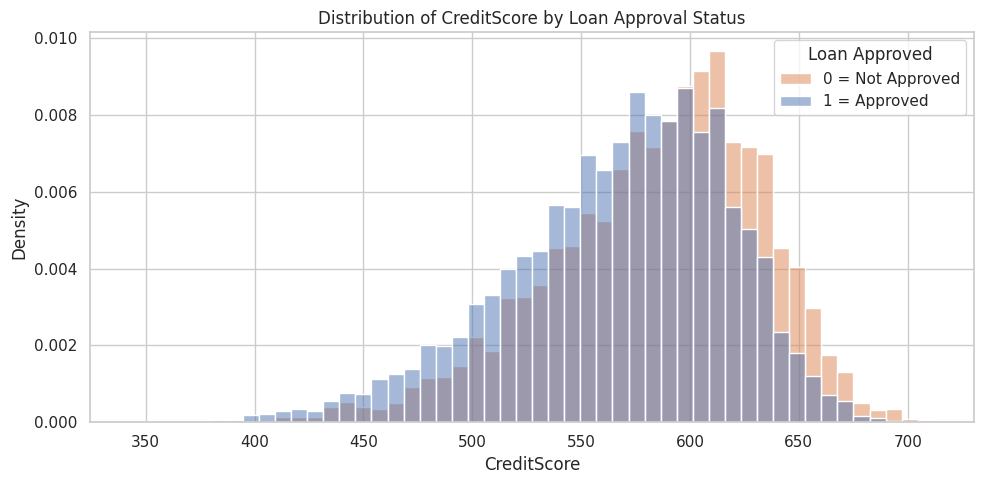

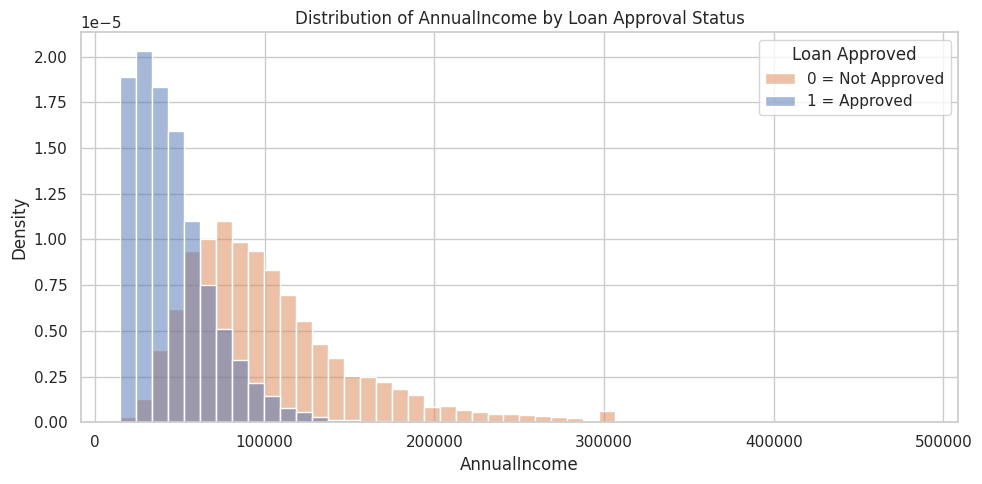

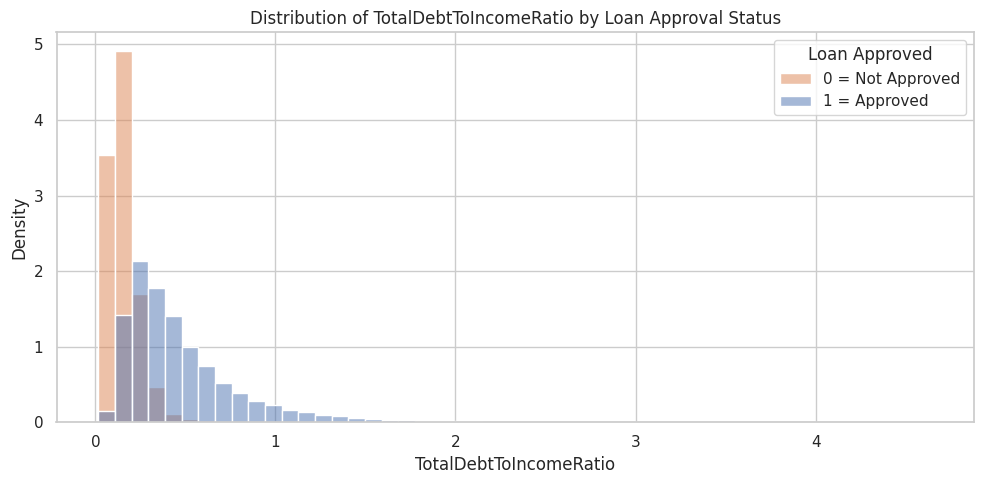

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# Loop through each feature and plot histogram by LoanApproved class
for feature in ['CreditScore', 'AnnualIncome', 'TotalDebtToIncomeRatio']:
    plt.figure()
    sns.histplot(data=df, x=feature, hue='LoanApproved', bins=50, kde=False, stat='density', common_norm=False)
    plt.title(f'Distribution of {feature} by Loan Approval Status')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend(title='Loan Approved', labels=['0 = Not Approved', '1 = Approved'])
    plt.tight_layout()
    plt.show()


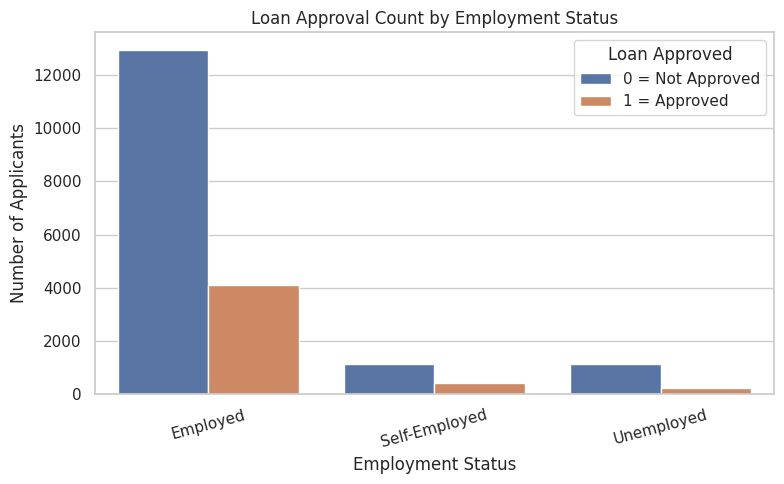

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Create a countplot grouped by LoanApproved
sns.countplot(data=df, x='EmploymentStatus', hue='LoanApproved')

# Set plot title and labels
plt.title('Loan Approval Count by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Number of Applicants')
plt.legend(title='Loan Approved', labels=['0 = Not Approved', '1 = Approved'])
plt.xticks(rotation=15)  # Rotate labels if needed
plt.tight_layout()
plt.show()


### Step 5 – Data Cleaning & Preparation

Final preprocessed features:


,CreditScore,AnnualIncome,TotalDebtToIncomeRatio,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed
0,0.890021,-0.476172,-0.652388,False,False
1,1.105724,-0.482095,-0.036378,False,False
2,-0.031618,-0.456940,0.176962,False,False
3,-0.521852,0.245912,-0.262848,False,False
4,0.439006,1.093004,-0.979511,False,False


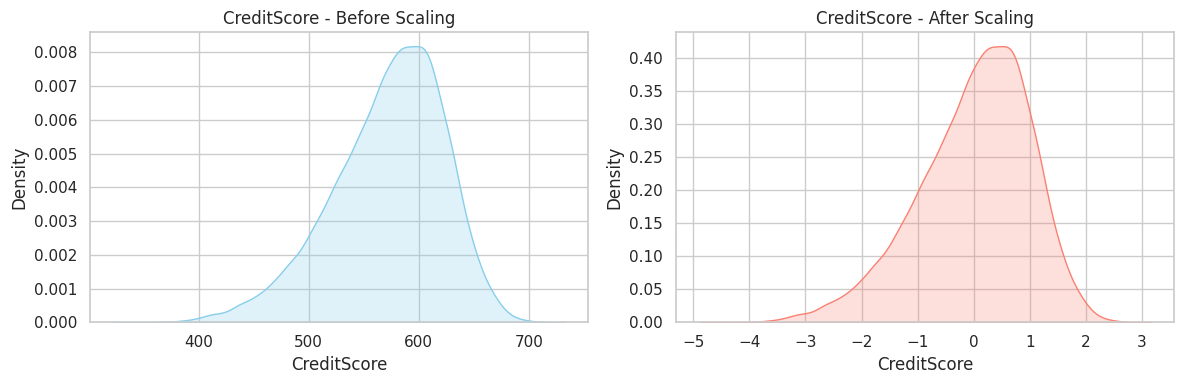

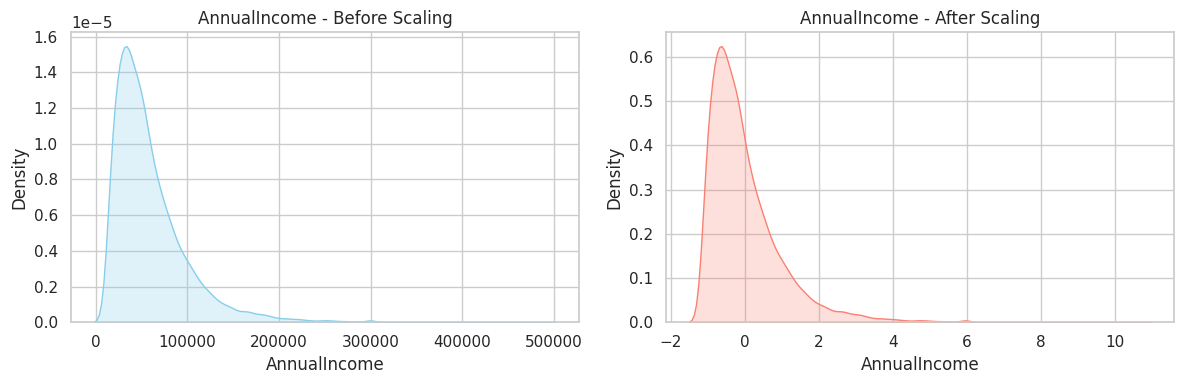

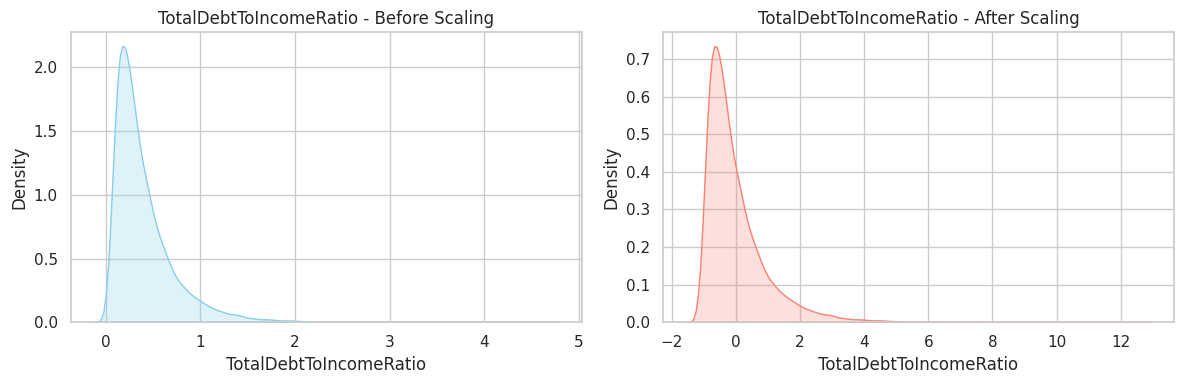


Target variable distribution:
LoanApproved
0    0.761
1    0.239
Name: proportion, dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Step 1: Copy only selected features + target
features = ['CreditScore', 'AnnualIncome', 'EmploymentStatus', 'TotalDebtToIncomeRatio']
target = 'LoanApproved'
data = df[features + [target]].copy()

# Step 2: One-hot encode the categorical feature
data_encoded = pd.get_dummies(data, columns=['EmploymentStatus'], drop_first=True)

# Step 3: Separate features and target
X = data_encoded.drop(columns=[target])
y = data_encoded[target]

# Step 4: Scale the numerical features
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[['CreditScore', 'AnnualIncome', 'TotalDebtToIncomeRatio']] = scaler.fit_transform(
    X_scaled[['CreditScore', 'AnnualIncome', 'TotalDebtToIncomeRatio']]
)

# Step 5: Display the first few rows of the final input features
print("Final preprocessed features:")
display(X_scaled.head())

# Step 6: Visualize scaling before/after (subplot version for clarity)
import matplotlib.pyplot as plt
import seaborn as sns

scaled_features = ['CreditScore', 'AnnualIncome', 'TotalDebtToIncomeRatio']

for feature in scaled_features:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.kdeplot(data=df[feature], ax=axes[0], fill=True, color='skyblue')
    axes[0].set_title(f'{feature} - Before Scaling')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Density')

    sns.kdeplot(data=X_scaled[feature], ax=axes[1], fill=True, color='salmon')
    axes[1].set_title(f'{feature} - After Scaling')
    axes[1].set_xlabel(feature)
    axes[1].set_ylabel('Density')

    plt.tight_layout()
    plt.show()

# Step 7: Display target variable distribution
print("\nTarget variable distribution:")
print(y.value_counts(normalize=True))

### Step 6 – Train Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Step 2: Initialize and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 4: Evaluate model performance
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Approved", "Approved"]))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy on Test Set: 0.86825

Classification Report:
              precision    recall  f1-score   support

Not Approved       0.89      0.94      0.92      3044
    Approved       0.77      0.63      0.70       956

    accuracy                           0.87      4000
   macro avg       0.83      0.79      0.81      4000
weighted avg       0.86      0.87      0.86      4000


Confusion Matrix:
[[2867  177]
 [ 350  606]]


### Step 7: Apply Model to Test Set & Generate Submission File

In [ ]:
# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'index': y_test.index,
    'LoanApproved': y_pred
})

# Sort by original index (optional but helpful for readability)
submission_df = submission_df.sort_values(by='index')

# Save to CSV
submission_df.to_csv('loan_approval_submission.csv', index=False)

print("Submission file 'loan_approval_submission.csv' has been created.")

Submission file 'loan_approval_submission.csv' has been created.


In [8]:
#Preveiw csv file
# Show a preview of the first few rows (for screenshot)
print("CSV file created. Preview of the first 5 predictions:")
display(submission_df.head())

CSV file created. Preview of the first 5 predictions:


,index,LoanApproved
2076,1,0
1617,4,1
2986,6,0
1647,8,1
1129,12,1
